# ProtVec : protein-vectors

In [38]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

In [55]:
# loading pre-trained protein vectors

In [14]:
protein_vecFile = 'protVec_100d_3grams.csv'

In [35]:
readFile = open(protein_vecFile, 'r')
protein_seq=list()
protein_vec = list()
for line in readFile:
    line = line.replace('\n','')
    values = line.split('\t')
    protein_seq.append(values[0])
    protein_vec.append([float(value) for value in values[1::]])
readFile.close()
protein_vec = np.matrix(protein_vec)

In [56]:
# converting protein to integer and integer to protein  

In [44]:
words = set(protein_seq)
word2int = {}
int2word = {}
vocab_size = len(words)
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [57]:
# reducing dimension of the each vectors from 100 to 2

In [58]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(protein_vec)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0.2, 0.8))
scaler.fit(vectors)
vectors = scaler.transform(vectors)

In [59]:
# plotting vectos in a two dimensoinal space

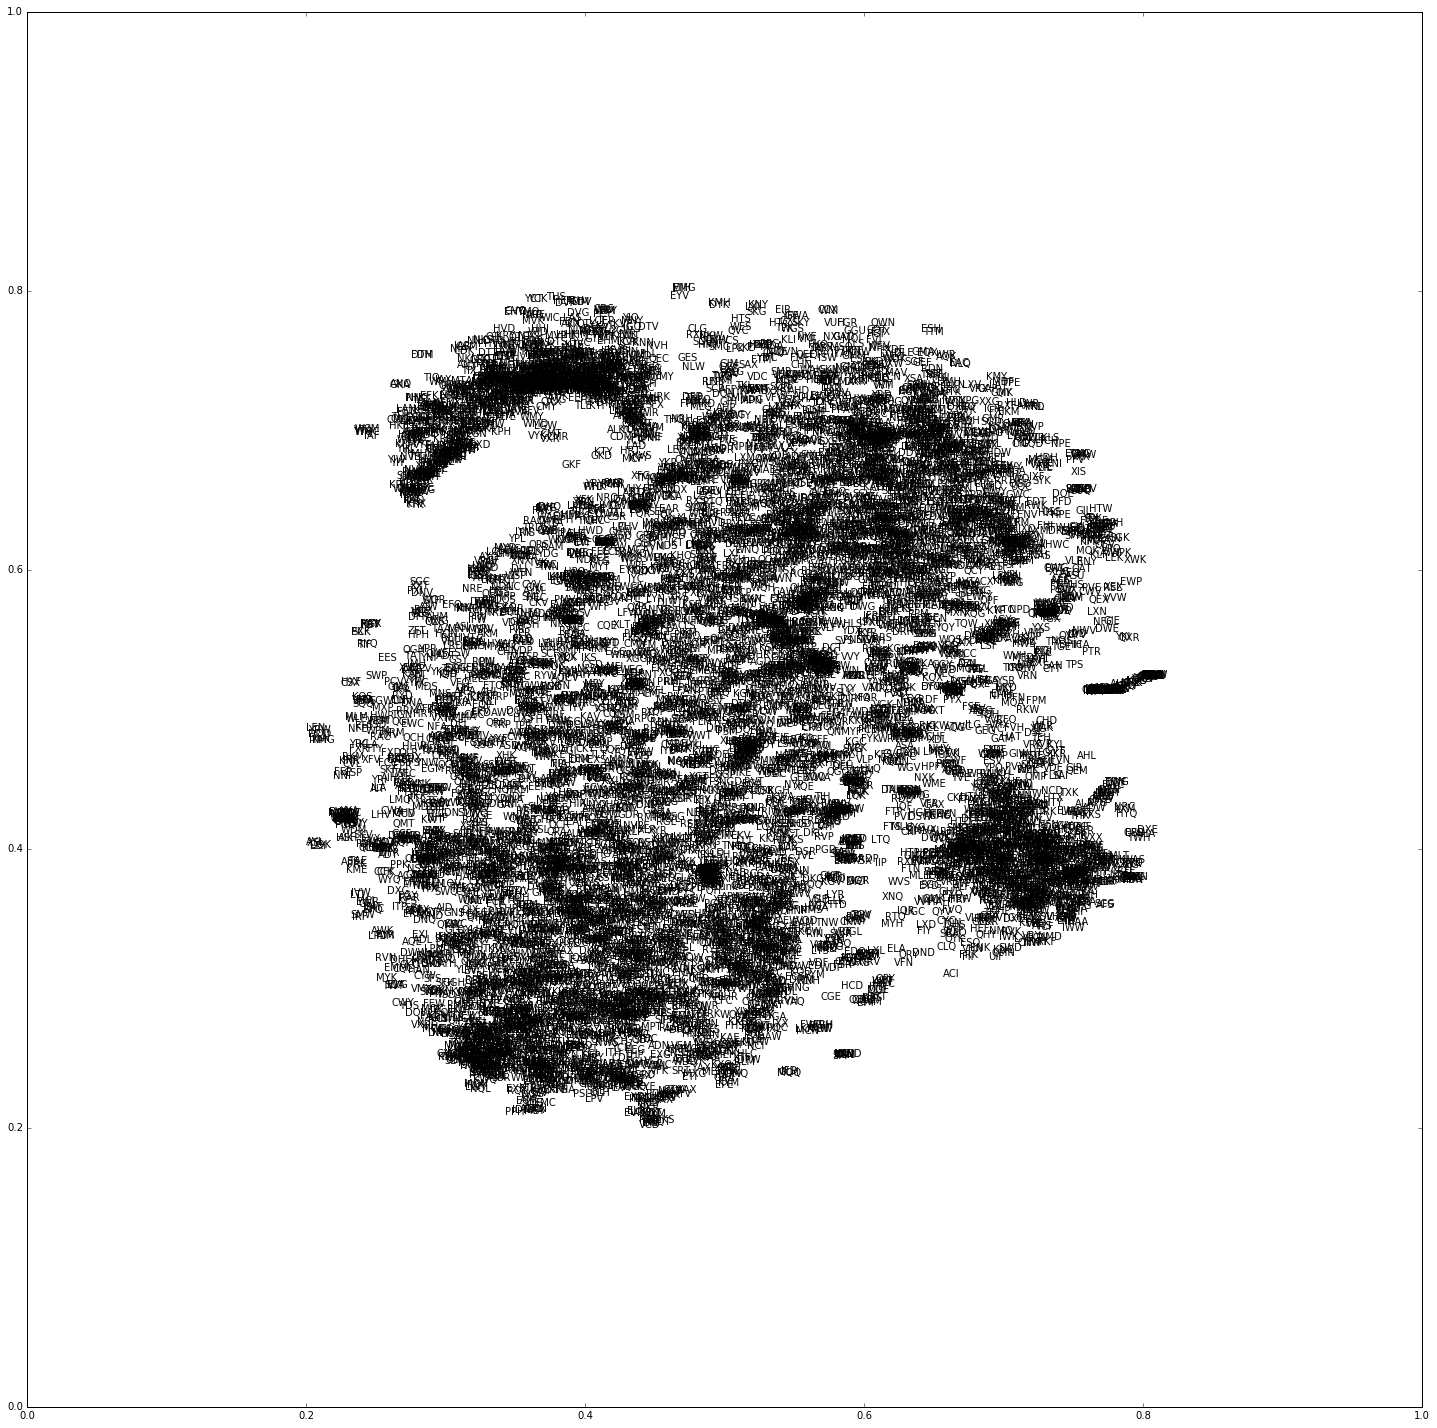

In [60]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 25
plt.rcParams["figure.figsize"] = fig_size
fig, ax = plt.subplots()
for word in protein_seq:
    #print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1]))
plt.show()

In [61]:
# getting nearest protein sequence

In [62]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [63]:
print(int2word[find_closest(word2int['AAA'], vectors)])
print(int2word[find_closest(word2int['LLL'], vectors)])
print(int2word[find_closest(word2int['ALA'], vectors)])

KFE
WFN
ADW


In [6]:
# checking the above prediction with the original sequences

In [2]:
readFile = open('family_classification_sequences.csv', 'r')
seqText = readFile.read()
readFile.close()

In [4]:
print seqText.count('AAAKFE')
print seqText.count('LLLWFN')
print seqText.count('ALAADW')

5
15
16
